In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from plotnine import *
import glob


In [42]:
d_name = "Naturaleza"
data_path = f"../../../data/experiments/experiment2/{d_name}\\"
file_names = f"resultados_exp_2_{d_name}_"


df = pd.DataFrame(columns=['model','param_value','mean','std','emb-type','stand-type', 'E-type'])

for file in glob.glob(data_path+file_names+'*.csv', recursive=False):
    # print the path name of selected files
    temp_df = pd.read_csv(file)
    
    embedding_type, standardization_type = file.removeprefix(data_path).removeprefix(file_names).removesuffix('.csv').split("_")
    # break
    temp_df['emb-type'] = embedding_type
    temp_df['stand-type'] = standardization_type[:4].capitalize()+'.'

    df = pd.concat([df,temp_df],ignore_index=True)


df['min'] = df['mean']-df['std']
df['max'] = df['mean']+df['std']
df['ec-type'] = df['emb-type'] + ' ' + df['stand-type'] + ' ' + df['model'] 


target_row = df[df['ec-type'] == "Word2Vec Norm. K-Means"].index
extras = df[df['ec-type'] != "Word2Vec Norm. K-Means"].index


df = pd.concat((df.iloc[target_row, :], df.iloc[extras,:]), axis=0,ignore_index=True)

In [43]:
df.iloc[:2,-1] = "AC-PLT"

c:\Users\dra98\OneDrive\Documentos\Trabajo\Doctorado\Codigo\myvenv\lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 15 x 7 in image.
c:\Users\dra98\OneDrive\Documentos\Trabajo\Doctorado\Codigo\myvenv\lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: ../../../data/results/IMG/Naturaleza_resultados_exp2.png


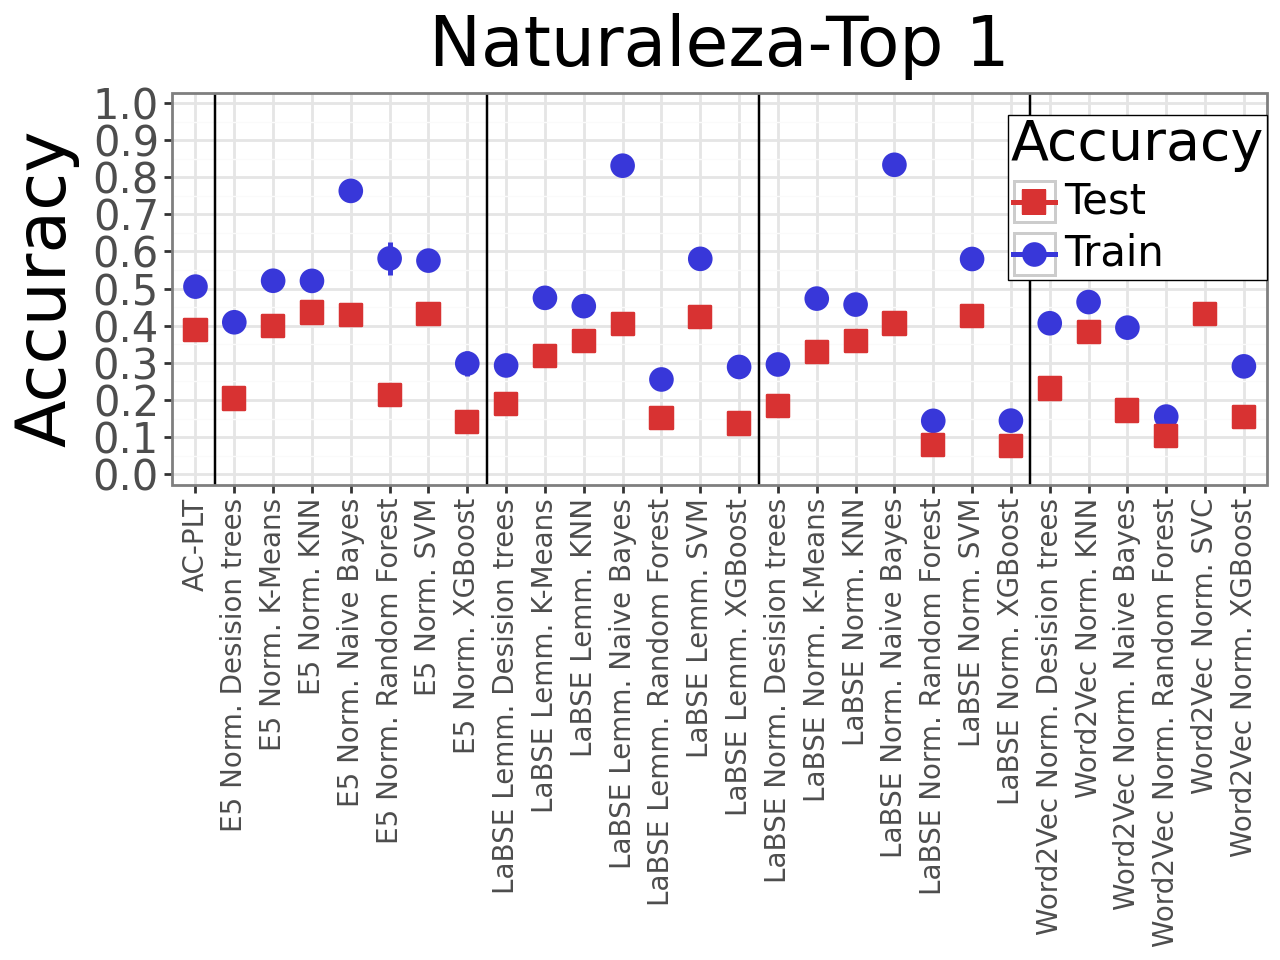

In [44]:

temp=(ggplot(df)+aes(x='ec-type',y="mean",color="E-type",shape="E-type",ymin="min",ymax="max")+theme_bw()
+theme(legend_position=(1,0.9))
# +facet_grid(cols="emb-type")
+geom_point(size=4)
+labs(title=(d_name+"-Top "+str(1)), x="", y="Accuracy")
+theme(axis_text_y = element_text(size=15))+theme(axis_title_y = element_text(size=20))
+theme(axis_text_x = element_text(size=10, rotation=90))
+theme(title = element_text(size=25))
+theme(legend_title = element_text(size=20))+theme(legend_background = element_rect(color="black",size=0.5))
+theme(legend_text = element_text(size=15))
+geom_linerange(size=1)
+scale_y_continuous(breaks=(0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.7,0.8,0.9,1.0),limits = (0.02,0.98))
+scale_color_manual(name = "Accuracy",values=["#D83232","#3837D9"])
+scale_shape_manual(name = "Accuracy",values = ["s",'o'])
+geom_vline(xintercept = 1.5, colour = "black")
+geom_vline(xintercept = 8.5, colour = "black")
+geom_vline(xintercept = 15.5, colour = "black")
+geom_vline(xintercept =22.5, colour = "black")
)
temp.save(filename=f'../../../data/results/IMG/{d_name}_resultados_exp2.png',width=15, height=7, units='in')
temp.show()